In [1]:
# Importación de pandas para traspasar el dataset de CSV a dataframe
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df_Train_csv_original_filled = pd.read_csv('df_Train_csv_original_filled.csv')
df_step_0 = df_Train_csv_original_filled.rename(columns={'growth_rate': 'Growth_Rate'})

In [2]:
# Drop Employee_ID
df_step_1 = df_step_0.drop('Employee_ID', axis=1)
print(df_step_1.columns.tolist())

['Gender', 'Age', 'Education_Level', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess', 'Time_of_service', 'Time_since_promotion', 'Growth_Rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'Attrition_rate']


In [3]:
# Drop VAR
df_step_2 = df_step_1.drop(['VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7'], axis=1)
print(df_step_2.columns.tolist())

['Gender', 'Age', 'Education_Level', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess', 'Time_of_service', 'Time_since_promotion', 'Growth_Rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance', 'Attrition_rate']


In [4]:
# Gender column type transformation (Male -> 0, Female -> 1)
df_step_3 = df_step_2
df_step_3['Gender'] = df_step_3['Gender'].map({'M': 0, 'F': 1, 'Non-Binary': 2})
df_step_3['Gender']

0       1
1       0
2       1
3       1
4       1
       ..
6995    1
6996    1
6997    1
6998    1
6999    1
Name: Gender, Length: 7000, dtype: int64

In [5]:
# Relationship Status transformation (Single -> 0, Married -> 1)
df_step_4 = df_step_3
df_step_4['Relationship_Status'] = df_step_4['Relationship_Status'].map({'Single': 0, 'Married': 1, 'Non-Binary': 2})
df_step_4['Relationship_Status']

0       1
1       0
2       1
3       0
4       1
       ..
6995    1
6996    1
6997    0
6998    1
6999    1
Name: Relationship_Status, Length: 7000, dtype: int64

In [6]:
# Hometown dummiefication
df_step_5 = df_step_4
df_dummies = pd.get_dummies(df_step_5['Hometown'], prefix='Hometown')
df_dummies = df_dummies.astype(int)
df_step_5 = pd.concat([df_step_5.drop(columns=['Hometown']), df_dummies], axis=1)
df_step_5
# df_step_5['Hometown_Washington'].dtype

,Gender,Age,Education_Level,Relationship_Status,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,Growth_Rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_rate,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington
0,1,42.0,4,1,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,0.1841,0,1,0,0,0
1,0,24.0,3,0,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,0.0670,0,0,0,1,0
2,1,58.0,3,1,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,0.0851,1,0,0,0,0
3,1,26.0,3,0,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,0.0668,0,0,1,0,0
4,1,31.0,1,1,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,0.1827,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,1,23.0,5,1,Operarions,Behavioral,4.0,1,20,1,2,6.0,type3,3.0,0.7839,0,1,0,0,0
6996,1,44.0,1,1,R&D,Analytical,16.0,2,59,0,2,4.0,type3,3.0,0.1055,0,0,1,0,0
6997,1,49.0,3,0,IT,Directive,10.0,1,59,1,2,3.0,type2,4.0,0.7847,0,0,0,1,0
6998,1,47.0,3,1,Sales,Behavioral,24.0,1,21,1,5,8.0,type0,2.0,0.4162,0,0,0,0,1


In [7]:
# Unit Operational VS Strategic view
df_step_6 = df_step_5
strategic_departments = ['R&D', 'Accounting and Finance', 'HR Management', 'Marketing', 'Quality', 'Security']
df_step_6['Operational_Strategic'] = df_step_6['Unit'].apply(lambda x: 0 if x in strategic_departments else 1)
df_step_6
#df_step_6['Operational_Strategic'].value_counts()

,Gender,Age,Education_Level,Relationship_Status,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,Growth_Rate,Travel_Rate,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_rate,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Operational_Strategic
0,1,42.0,4,1,IT,Conceptual,4.0,4,33,1,...,7.0,type2,3.0,0.1841,0,1,0,0,0,1
1,0,24.0,3,0,Logistics,Analytical,5.0,4,36,0,...,6.0,type2,4.0,0.0670,0,0,0,1,0,1
2,1,58.0,3,1,Quality,Conceptual,27.0,3,51,0,...,8.0,type2,1.0,0.0851,1,0,0,0,0,0
3,1,26.0,3,0,Human Resource Management,Behavioral,4.0,3,56,1,...,8.0,type2,1.0,0.0668,0,0,1,0,0,1
4,1,31.0,1,1,Logistics,Conceptual,5.0,4,62,1,...,2.0,type3,3.0,0.1827,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,1,23.0,5,1,Operarions,Behavioral,4.0,1,20,1,...,6.0,type3,3.0,0.7839,0,1,0,0,0,1
6996,1,44.0,1,1,R&D,Analytical,16.0,2,59,0,...,4.0,type3,3.0,0.1055,0,0,1,0,0,0
6997,1,49.0,3,0,IT,Directive,10.0,1,59,1,...,3.0,type2,4.0,0.7847,0,0,0,1,0,1
6998,1,47.0,3,1,Sales,Behavioral,24.0,1,21,1,...,8.0,type0,2.0,0.4162,0,0,0,0,1,1


In [8]:
# Hometown dummiefication
df_step_7 = df_step_6
df_dummies = pd.get_dummies(df_step_7['Unit'], prefix='Unit')
df_dummies = df_dummies.astype(int)
df_step_7 = pd.concat([df_step_7.drop(columns=['Unit']), df_dummies], axis=1)
df_step_7

,Gender,Age,Education_Level,Relationship_Status,Decision_skill_possess,Time_of_service,Time_since_promotion,Growth_Rate,Travel_Rate,Post_Level,...,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security
0,1,42.0,4,1,Conceptual,4.0,4,33,1,1,...,1,0,0,0,0,0,0,0,0,0
1,0,24.0,3,0,Analytical,5.0,4,36,0,3,...,0,1,0,0,0,0,0,0,0,0
2,1,58.0,3,1,Conceptual,27.0,3,51,0,2,...,0,0,0,0,0,0,1,0,0,0
3,1,26.0,3,0,Behavioral,4.0,3,56,1,3,...,0,0,0,0,0,0,0,0,0,0
4,1,31.0,1,1,Conceptual,5.0,4,62,1,3,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,1,23.0,5,1,Behavioral,4.0,1,20,1,2,...,0,0,0,1,0,0,0,0,0,0
6996,1,44.0,1,1,Analytical,16.0,2,59,0,2,...,0,0,0,0,0,0,0,1,0,0
6997,1,49.0,3,0,Directive,10.0,1,59,1,2,...,1,0,0,0,0,0,0,0,0,0
6998,1,47.0,3,1,Behavioral,24.0,1,21,1,5,...,0,0,0,0,0,0,0,0,1,0


In [9]:
# Decision_skill_possess dummiefication
df_step_8 = df_step_7
df_dummies = pd.get_dummies(df_step_8['Decision_skill_possess'], prefix='Decision_skill_possess')
df_dummies = df_dummies.astype(int)
df_step_8 = pd.concat([df_step_8.drop(columns=['Decision_skill_possess']), df_dummies], axis=1)
df_step_8

,Gender,Age,Education_Level,Relationship_Status,Time_of_service,Time_since_promotion,Growth_Rate,Travel_Rate,Post_Level,Pay_Scale,...,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive
0,1,42.0,4,1,4.0,4,33,1,1,7.0,...,0,0,0,0,0,0,0,0,1,0
1,0,24.0,3,0,5.0,4,36,0,3,6.0,...,0,0,0,0,0,0,1,0,0,0
2,1,58.0,3,1,27.0,3,51,0,2,8.0,...,0,0,1,0,0,0,0,0,1,0
3,1,26.0,3,0,4.0,3,56,1,3,8.0,...,0,0,0,0,0,0,0,1,0,0
4,1,31.0,1,1,5.0,4,62,1,3,2.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,1,23.0,5,1,4.0,1,20,1,2,6.0,...,0,0,0,0,0,0,0,1,0,0
6996,1,44.0,1,1,16.0,2,59,0,2,4.0,...,0,0,0,1,0,0,1,0,0,0
6997,1,49.0,3,0,10.0,1,59,1,2,3.0,...,0,0,0,0,0,0,0,0,0,1
6998,1,47.0,3,1,24.0,1,21,1,5,8.0,...,0,0,0,0,1,0,0,1,0,0


In [10]:
# Compensation_and_Benefits Binary transformation
df_step_9 = df_step_8
low_compensation = ['type0', 'type1', 'type2']
df_step_9['Compensation_and_Benefits'] = df_step_9['Compensation_and_Benefits'].apply(lambda x: 0 if x in low_compensation else 1)
df_step_9
df_step_9['Compensation_and_Benefits'].value_counts()

Compensation_and_Benefits
0    4265
1    2735
Name: count, dtype: int64

In [11]:
def categorical_value_counts(df):
    df_filled = df.copy()  # Create a copy to avoid undesired modifications.
    for column in df_filled.columns:
        if df_filled[column].dtype in ['float64', 'int64', 'int32']:  # It is numeric
            pass
        else:  # It is categorical
            print(df_filled[column].value_counts())
            print("\n")
    return

categorical_value_counts(df_step_9)

In [12]:
correlations = df_step_9.corr()['Attrition_rate'].sort_values(ascending=False)

# Crear un DataFrame para mostrar las correlaciones como lista
correlation_list = correlations.reset_index()
correlation_list.columns = ['Column', 'Correlation']

print(correlation_list)

                               Column  Correlation
0                      Attrition_rate     1.000000
1                   Work_Life_balance     0.020738
2   Decision_skill_possess_Conceptual     0.016568
3                          Post_Level     0.016402
4                     Unit_Purchasing     0.015279
5                     Unit_Operarions     0.015147
6                Hometown_Springfield     0.014555
7                         Growth_Rate     0.014247
8                Time_since_promotion     0.013880
9                            Unit_R&D     0.013868
10   Decision_skill_possess_Directive     0.013680
11                         Unit_Sales     0.007789
12                     Unit_Marketing     0.002422
13                    Unit_Production     0.001297
14                      Unit_Security     0.001183
15                Hometown_Washington    -0.001122
16                   Hometown_Clinton    -0.001454
17  Decision_skill_possess_Analytical    -0.002822
18        Unit_Accounting and F

Teniendo en cuenta el medidor de importancia en RF, trato de eliminar aquellos campos que no resultan ser aporte suficiente ya que no consigo superar el R2 negativo.
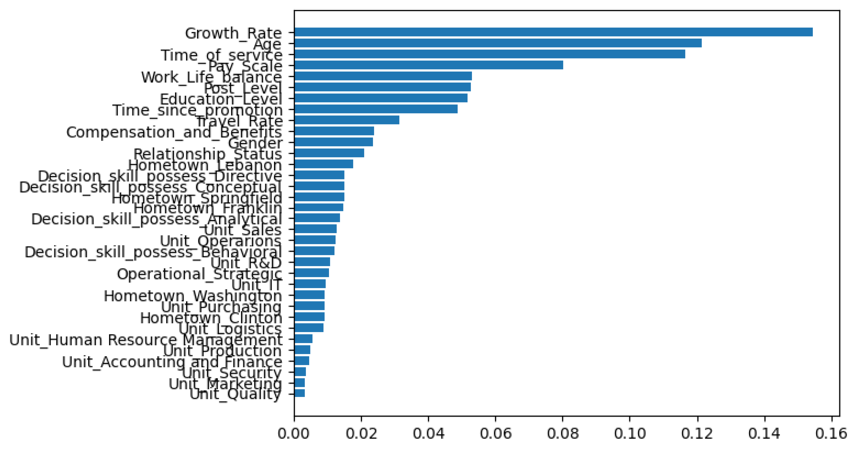



In [13]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['Unit_Quality', 'Unit_Marketing', 'Unit_Security',
       'Unit_Accounting and Finance', 'Unit_Production',
       'Unit_Human Resource Management', 'Unit_Logistics', 'Hometown_Clinton',
       'Unit_Purchasing', 'Hometown_Washington', 'Unit_IT',
       'Operational_Strategic', 'Unit_R&D',
       'Decision_skill_possess_Behavioral', 'Unit_Operarions', 'Unit_Sales',
       'Decision_skill_possess_Analytical', 'Hometown_Franklin',
       'Hometown_Springfield', 'Decision_skill_possess_Conceptual',
       'Decision_skill_possess_Directive', 'Hometown_Lebanon',
       'Relationship_Status', 'Gender', 'Compensation_and_Benefits']

# Eliminar columnas del DataFrame
df_step_10 = df_step_9.drop(columns=columnas_a_eliminar)

In [16]:
df_step_10['Ratio_Age_Time_of_service'] = df_step_10['Time_of_service'] / df_step_10['Age']

columnas_a_eliminar = ['Age', 'Time_of_service']
df_step_11 = df_step_10.drop(columns=columnas_a_eliminar)

In [17]:
# Save dataframe clean
df_step_11.to_csv('df_Train_clean_v2.csv', index=False)